## 线性回归模型中需要得到的结果，以及遇到的一些问题
### 1、多元或者一元线性模型中，F、T检验不通过。可能出现的原因：
       1、自变量xi与因变量Y的相关关系不显著。需要逐一进行一元分析，选择是否剔除
       2、存在多重共线性，解决思路是通过容忍度和方差扩大因子判别是否存在多重共线性。若存在，剔除
       3、在进行多元回归时，进行变量选择。原则：看选择后SSE是否显著减少。有向前、向后、逐步选择
### 2、数据预处里中出现的问题
       1、数据存在空值
       2、数据存在异常值，最回归造成较大的影响
### 3、任何回归模型，需要利用Q-Q图，验证模型残差是否符合正态分布的假设
       sns.set(font=getChineseFont(8).get_name())
       pp_qq_plot=sm.ProbPlot(lm_model2.resid)
       pp_qq_plot.qqplot(line='q')
       plt.title('Q-Q图')
       plt.show()

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


import scipy.stats as stats
import statsmodels.api as sm                      #sm是得出模型的一些参数化数据的重要库
from scipy.stats import chi2_contingency

In [54]:
import numpy as np
import pandas as pd
import datetime
from urllib import request
import json
 
def get_sina_kline(symbol='m2201', period='d', market='期货',**kwargs) -> 'DataFrame':
    '''
    用途：获取sina股票期货指定周期的人历史1023个数据
    返回：DataFrame  columns name [date,open,high,low,close,volume]
    参数:
    symbol品种代码,
    period是周期(5m,15m,30m,60m日线),datalen是获取数据的长度，最大就是1023
    mode=['股票','期货','股指期货']
    kwargs:仅用于A股
    stock_zh_a_daily(symbol: str = 'sh603843', start_date: str = '19900101', end_date: str = '21000118', adjust: str = '') ->‘DataFrame’
    start_date: str = '19900101',
    end_date: str = '21000118',
    adjust: str = '' 默认为空: 返回不复权的数据;
        qfq: 返回前复权后的数据; hfq: 返回后复权后的数据; hfq-factor: 返回后复权因子; hfq-factor: 返回前复
    实例：
    get_sina_kline(symbol='sh000001', period='60m', market='股票')
    get_sina_kline(symbol='sh000001', period='d', market='股票')
    get_sina_kline(symbol='rb1910', period='60m', market='期货')
    get_sina_kline(symbol='rb1910', period='d', market='期货')
    get_sina_kline(symbol='IF1908', period='60m', market='股指期货')
    get_sina_kline(symbol='IF1908', period='d', market='股指期货')
    说明：
    股票历史数据API:
    5分钟：https://quotes.sina.cn/cn/api/json_v2.php/CN_MarketDataService.getKLineData?symbol=sh000001&scale=5&datalen=1023
    15分钟：https://quotes.sina.cn/cn/api/json_v2.php/CN_MarketDataService.getKLineData?symbol=sh000001&scale=15&datalen=1023
    30分钟：https://quotes.sina.cn/cn/api/json_v2.php/CN_MarketDataService.getKLineData?symbol=sh000001&scale=30&datalen=1023
    60分钟：https://quotes.sina.cn/cn/api/json_v2.php/CN_MarketDataService.getKLineData?symbol=sh000001&scale=60&datalen=1023
    商品期货历史数据API:
    5分钟：http://stock2.finance.sina.com.cn/futures/api/json.php/IndexService.getInnerFuturesMiniKLine5m?symbol=rb1910
    15分钟：http://stock2.finance.sina.com.cn/futures/api/json.php/IndexService.getInnerFuturesMiniKLine15m?symbol=rb1910
    30分钟：http://stock2.finance.sina.com.cn/futures/api/json.php/IndexService.getInnerFuturesMiniKLine30m?symbol=rb1910
    60分钟：http://stock2.finance.sina.com.cn/futures/api/json.php/IndexService.getInnerFuturesMiniKLine60m?symbol=rb1910
    日K线：http://stock2.finance.sina.com.cn/futures/api/json.php/IndexService.getInnerFuturesDailyKLine?symbol=rb1910
    股指期货历史数据API:
    5分钟：http://stock2.finance.sina.com.cn/futures/api/json.php/CffexFuturesService.getCffexFuturesMiniKLine5m?symbol=IF1908
    15分钟：http://stock2.finance.sina.com.cn/futures/api/json.php/CffexFuturesService.getCffexFuturesMiniKLine15m?symbol=IF1908
    30分钟：http://stock2.finance.sina.com.cn/futures/api/json.php/CffexFuturesService.getCffexFuturesMiniKLine30m?symbol=IF1908
    60分钟：http://stock2.finance.sina.com.cn/futures/api/json.php/CffexFuturesService.getCffexFuturesMiniKLine60m?symbol=IF1908
    日线：http://stock2.finance.sina.com.cn/futures/api/json.php/CffexFuturesService.getCffexFuturesDailyKLine?symbol=IF1908
    '''
    cols = ['date', 'open', 'high', 'low', 'close', 'volume']
    if market == '股票':
        if period in ['5m', '15m', '30m', '60m']:
            url = 'https://quotes.sina.cn/cn/api/json_v2.php/CN_MarketDataService.getKLineData?symbol=%s&scale=%s&datalen=1023' % (
                symbol, period[:-1])
        else:
            data=lambda key,default:kwargs[key] if key in kwargs else default
            start_date=data('start_date', '19900101')
            end_date = data('end_date', '20000101')
            adjust = data('adjust', '')
            df= ak.stock_zh_a_daily(symbol, start_date, end_date, adjust)
            return df[cols]
 
    elif market=='期货':
        if period in ['5m', '15m', '30m', '60m']:
            url = 'http://stock2.finance.sina.com.cn/futures/api/json.php/IndexService.getInnerFuturesMiniKLine%s?symbol=%s' % (
                period, symbol)
        else:
            url = 'http://stock2.finance.sina.com.cn/futures/api/json.php/IndexService.getInnerFuturesDailyKLine?symbol=%s' % (
                symbol)
    else:
        if period in ['5m', '15m', '30m', '60m']:
            url = 'http://stock2.finance.sina.com.cn/futures/api/json.php/CffexFuturesService.getCffexFuturesMiniKLine%s?symbol=%s' % (
                period, symbol)
        else:
            url = 'http://stock2.finance.sina.com.cn/futures/api/json.php/CffexFuturesService.getCffexFuturesDailyKLine?symbol=%s' % (
                symbol)
 
    req = request.Request(url)
    rsp = request.urlopen(req)
    res = rsp.read()
    res_json = json.loads(res)
    df= pd.DataFrame(res_json)
    if market == '股票':
        df.rename(columns={'day':'date'}, inplace=True)
        df =df[cols]
    else:
        df.rename(columns=dict(zip(df.columns,cols)), inplace=True)
    return df
 
 
# global_gdp_radio_quarterly()
data = get_sina_kline(symbol='IF1908', period='d', market='股指期货')
data.head()

,date,open,high,low,close,volume
0,2019-06-24,3812,3818.6,3781.6,3807.8,379
1,2019-06-25,3800.8,3806,3720.2,3763,472
2,2019-06-26,3746.2,3778.4,3743.2,3759.4,274
3,2019-06-27,3775.4,3832,3774,3806.2,884
4,2019-06-28,3803,3811.6,3778,3810.8,688


In [55]:
data = data.set_index('date')
data.index = pd.to_datetime(data.index, format = '%Y-%m-%d')

In [56]:
data = data.astype(float)

In [57]:
data

,open,high,low,close,volume
date,,,,,
2019-06-24,3812.0,3818.6,3781.6,3807.8,379.0
2019-06-25,3800.8,3806.0,3720.2,3763.0,472.0
2019-06-26,3746.2,3778.4,3743.2,3759.4,274.0
2019-06-27,3775.4,3832.0,3774.0,3806.2,884.0
2019-06-28,3803.0,3811.6,3778.0,3810.8,688.0
2019-07-01,3887.6,3920.2,3860.0,3903.2,944.0
2019-07-02,3901.0,3912.2,3889.8,3905.6,451.0
2019-07-03,3889.6,3896.0,3861.2,3873.0,694.0
2019-07-04,3876.8,3890.8,3829.8,3851.2,950.0


In [58]:
data1 = data.copy()
data1['open_1'] = data1['open'].shift(-1)  #后一天的开盘价和前一天的各种数据进行线性回归拟合预测
data1

,open,high,low,close,volume,open_1
date,,,,,,
2019-06-24,3812.0,3818.6,3781.6,3807.8,379.0,3800.8
2019-06-25,3800.8,3806.0,3720.2,3763.0,472.0,3746.2
2019-06-26,3746.2,3778.4,3743.2,3759.4,274.0,3775.4
2019-06-27,3775.4,3832.0,3774.0,3806.2,884.0,3803.0
2019-06-28,3803.0,3811.6,3778.0,3810.8,688.0,3887.6
2019-07-01,3887.6,3920.2,3860.0,3903.2,944.0,3901.0
2019-07-02,3901.0,3912.2,3889.8,3905.6,451.0,3889.6
2019-07-03,3889.6,3896.0,3861.2,3873.0,694.0,3876.8
2019-07-04,3876.8,3890.8,3829.8,3851.2,950.0,3855.6


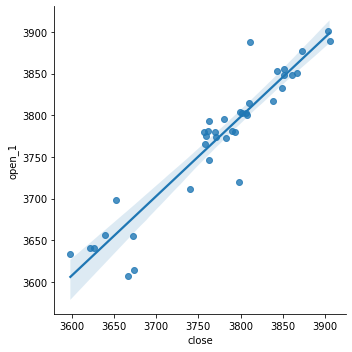

In [59]:
#对于简单的一元线性回归，通过绘制散点图进行简单的线性拟合
sns.lmplot(x='close',y='open_1',data=data1,
               legend_out=False,#将图例呈现在图框内
               truncate=True#根据实际的数据范围，对拟合线做截断操作
               )
plt.show()

In [60]:
#通过ols函数求得回归模型的参数解
fit_1=sm.formula.ols('open_1~close',data=data1).fit()
print(fit_1.params)#Intercept：-17.579095,speed：3.932409

Intercept    179.641252
close          0.952216
dtype: float64


In [61]:
print(fit_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 open_1   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     270.7
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           2.50e-18
Time:                        09:35:34   Log-Likelihood:                -179.81
No. Observations:                  38   AIC:                             363.6
Df Residuals:                      36   BIC:                             366.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    179.6413    218.454      0.822      0.4

In [62]:
#多元回归
fit_s=sm.formula.ols('open_1~high+low+close+volume',data=data1).fit()
print(fit_s.params)#Intercept:50122.192990,RD_Spend:0.805715,Administration:-0.026816,Marketing_Spend:0.027228

Intercept    479.835229
high          -0.398819
low           -0.003954
close          1.280917
volume        -0.000276
dtype: float64


In [63]:
print(fit_s.summary())

                            OLS Regression Results                            
Dep. Variable:                 open_1   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     72.26
Date:                Wed, 22 Jun 2022   Prob (F-statistic):           7.48e-16
Time:                        09:35:34   Log-Likelihood:                -177.23
No. Observations:                  38   AIC:                             364.5
Df Residuals:                      33   BIC:                             372.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    479.8352    253.771      1.891      0.0

## 进行异常值检测,回归过程依赖自变量的均值，及受异常值的影响

In [64]:
#异常值检验
outliers=fit_s.get_influence()
#高杠杆值点（帽子矩阵）
leverage=outliers.hat_matrix_diag
#diffits值
dffits=outliers.dffits[0]
#学生化残差,当学生化残差大于2时，即认为对应的数据点为异常值
resid_stu=outliers.resid_studentized_external
#cook距离
cook=outliers.cooks_distance[0]

In [87]:
concat_result=pd.concat([pd.Series(leverage,name='leverage'),pd.Series(dffits,name='diffits'),
pd.Series(resid_stu,name='resid_stu'),pd.Series(cook,name='cook')],axis=1)
concat_result

,leverage,diffits,resid_stu,cook
0,0.084359,-0.211724,-0.697538,0.009107
1,0.134371,-0.321017,-0.814781,0.020822
2,0.097577,0.023012,0.069981,0.000109
3,0.062922,-0.084586,-0.326428,0.001471
4,0.125247,0.982406,2.596269,0.164422
5,0.131480,0.006898,0.017728,0.000010
6,0.139107,-0.268659,-0.668348,0.014682
7,0.099000,0.065355,0.197163,0.000880
8,0.092489,0.118015,0.369673,0.002860
9,0.087840,-0.244802,-0.788868,0.012124


In [88]:
#计算异常值数量的比例
outliers_ratio=sum(np.where(np.abs(concat_result.resid_stu)>2,1,0))/concat_result.shape[0]
print(outliers_ratio)#0.04

0.07894736842105263


### 模型评估

In [ ]:
# 导入 r2_score 模块
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# 预测准确率
score = r2_score(y_test,y_prediction)
print("r2 : ",score)
print("均方误差 : ",mean_squared_error(y_test,y_prediction))
print("均方误差开方 : ",np.sqrt(mean_squared_error(y_test,y_prediction)))

In [ ]:
#通过筛选的方法，将异常点排除
none_outliers=raw_outliers.loc[np.abs(raw_outliers.resid_stu)<=2,]
#应用无异常值的数据集重新建模
fit3=sm.formula.ols('Profit~RD_Spend',data=profit).fit()
#返回模型的概览信息
print(fit3.params)#Intercept:49032.899141,RD_Spend:0.854291
print(fit3.summary())